In [1]:
import logging
import random

from backstrip import backplot
from nbmetalog import nbmetalog as nbm
import pandas as pd
from teeplot import teeplot as tp

random.seed(1)

logging.basicConfig(
    format="[%(funcName)s:%(lineno)d] %(message)s",
)
logger = logging.getLogger()


In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az881-437
interpreter: 3.11.9 (main, Jul 15 2024, 21:50:21) [GCC 11.4.0]
nbcellexec: null
nbname: benchmark
nbpath: /home/runner/work/wse-sketches/wse-sketches/binder/benchmark.ipynb
revision: null
session: 500f5c32-900f-48bb-96ce-3135699f2022
timestamp: 2024-09-09T12:39:12Z00:00




IPython==8.20.0
keyname==0.6.0
yaml==6.0.1
logging==0.5.1.2
nbmetalog==0.2.6
pandas==1.5.3
teeplot==1.0.1
re==2.2.1
comm==0.2.1
psutil==5.9.8
zmq==25.1.2
json==2.0.9
ipykernel==6.29.0


## Get Data


In [3]:
df = pd.read_csv("https://osf.io/egjxr/download")


In [4]:
df["Nanoseconds per Op"] = df["Nanoseconds"] / df["Num Operations"]


## Statistics


nanoseconds per op mean & SE


In [5]:
dfg = df.groupby(["Policy"]).agg(["mean", "sem"])
dfg


/tmp/ipykernel_5356/1182473837.py:1: FutureWarning: ['Implementation', 'Language'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfg = df.groupby(["Policy"]).agg(["mean", "sem"])


Nanoseconds               Replicate           Num Operations  \
                       mean           sem      mean       sem           mean   
Policy                                                                         
steady         5.112893e+08  3.864875e+06       9.5  1.322876      1000000.0   
tilted         2.304509e+08  1.564333e+05       9.5  1.322876      1000000.0   
tilted-sticky  2.862530e+08  3.701476e+05       9.5  1.322876      1000000.0   
trivial        4.664768e+06  1.896479e+04       9.5  1.322876      1000000.0   

                   Surface Size      Nanoseconds per Op            
               sem         mean  sem               mean       sem  
Policy                                                             
steady         0.0         64.0  0.0         511.289315  3.864875  
tilted         0.0         64.0  0.0         230.450926  0.156433  
tilted-sticky  0.0         64.0  0.0         286.252996  0.370148  
trivial        0.0         64.0  0.0           4.664768  0.018965

op to trivial ratio


In [6]:
df["Trivial Ratio"] = (
    df["Nanoseconds"]
    / df[(df["Policy"] == "trivial")]["Nanoseconds"].mean()
)
df.groupby(["Policy"])["Trivial Ratio"].agg(["mean", "sem"])


,mean,sem
Policy,,
steady,109.606591,0.828525
tilted,49.402442,0.033535
tilted-sticky,61.364895,0.079350
trivial,1.000000,0.004066


## Visualize Results


teeplots/orient=h+viz=backplot+x=nanoseconds-per-op+y=policy+ext=.pdf


teeplots/orient=h+viz=backplot+x=nanoseconds-per-op+y=policy+ext=.png


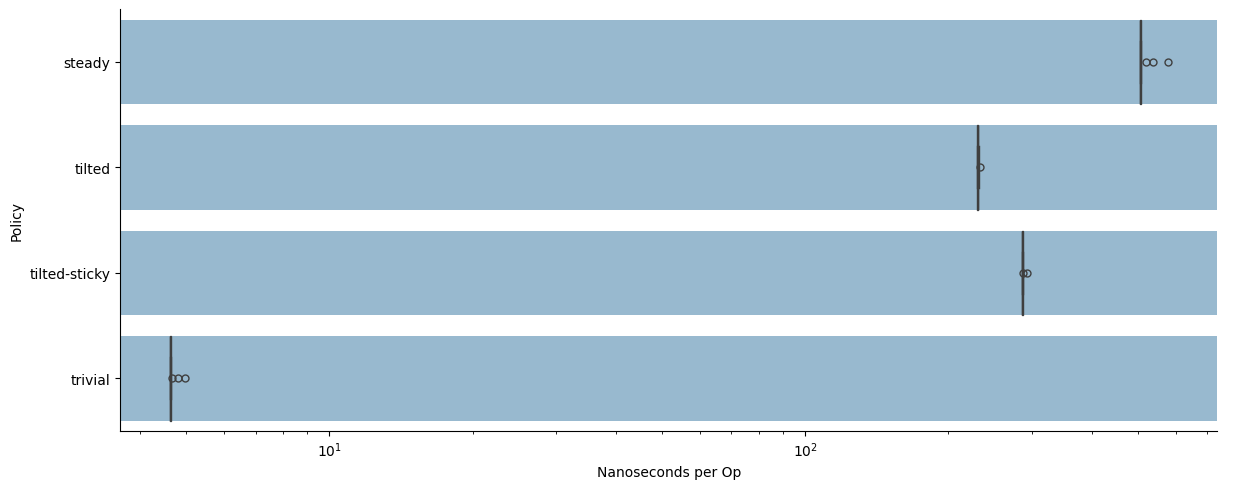

In [7]:
tp.tee(
    backplot,
    data=df,
    y="Policy",
    x="Nanoseconds per Op",
    orient="h",
    aspect=2.5,
    log_scale=(True, False),
)
